In [97]:
%matplotlib inline

In [98]:
import os
import os.path
import json
import re
from joblib import Parallel, delayed

In [142]:
from nltk.probability import ConditionalFreqDist, FreqDist
from nltk.stem.snowball import EnglishStemmer
from nltk.tokenize import word_tokenize

In [101]:
cfd = ConditionalFreqDist()
s = EnglishStemmer(ignore_stopwords=True)

rex = re.compile('(https?://\S+|(?:[#@])?\w[\w\']*)', re.U)

In [122]:
def processFile(filename):
    fd = FreqDist()
    with open(filename) as f:
        for tweet in json.load(f):
            for word in rex.findall(tweet[u'text']):
                if (not word.startswith('@') and
                    not word.startswith('#') and
                    not word.startswith('http')):
                    stem = s.stem(word.lower())
                else:
                    stem = word.lower()
                if len(stem) == 1 and not stem.isalnum():
                    continue
                if stem in s.stopwords:
                    continue
                if stem != '':
                    fd[stem] += 1
    return fd

In [123]:
for tag in [u'#nbafinals2015', u'#nbafinals2015_#warriors', u'#warriors']:
    words = {}
    for root, path, files in os.walk(u'tweets/' + tag):
        for fd in Parallel(n_jobs=8)(delayed(processFile)(os.path.join(root, filename)) for filename in files):
            cfd[tag].update(fd)
    cfd['all'].update(cfd[tag])
        

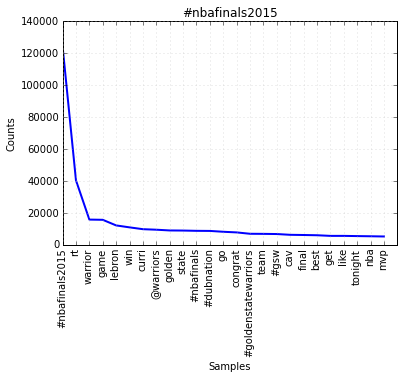

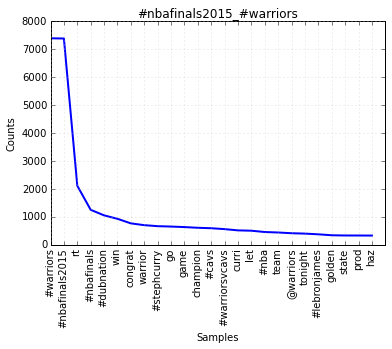

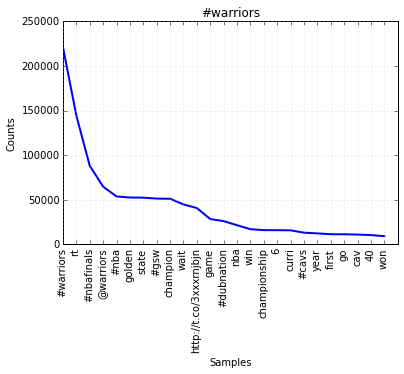

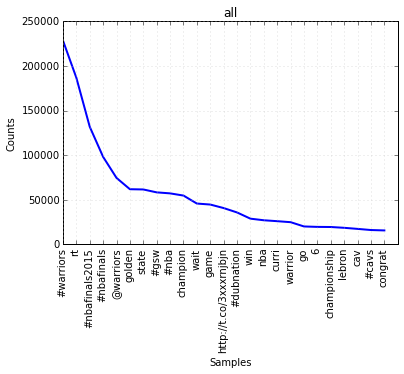

In [170]:
for tag in sorted(cfd.keys()):
    cfd[tag].plot(25, title=tag)